## Final metrics

Here we have the best configurations for the three selected models, let's see how the behave of the test data.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

## Data

In [3]:
data = pd.read_csv("../text_databases/review_polarity.csv")
data.fillna('', inplace=True)
data

,file_name,text,class
0,cv145_12239.txt,it was once said that in order to truly enjoy ...,neg
1,cv745_14009.txt,conventional wisdom among collectibles retaile...,neg
2,cv376_20883.txt,robin williams has the rarest of gifts : the a...,neg
3,cv109_22599.txt,nearly every film tim burton has directed has ...,neg
4,cv494_18689.txt,"you know , i never really wondered what the ta...",neg
...,...,...,...
1995,cv964_6021.txt,you've got to think twice before you go see a ...,pos
1996,cv989_15824.txt,"lisa cholodenko's "" high art , "" is an intelli...",pos
1997,cv355_16413.txt,to paraphrase a song title from an earlier dis...,pos
1998,cv463_10343.txt,one fun activity for parents during the holida...,pos


In [4]:
from sklearn.model_selection import train_test_split

# Same split used on hyperparameters search
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'],
                                                    test_size=0.2, random_state=14,
                                                    stratify=data['class'])

split_data = [X_train, X_test, y_train, y_test]

## MultinomialNB

In [5]:
df = pd.read_csv("outputs/MultinomialNB_polarity_grid_results.csv")
df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__alpha,param_vectorizer__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,8.028799,0.127444,0.775253,0.029083,0.20,"(1, 3)","{'classifier__alpha': 0.2, 'vectorizer__ngram_...",0.815625,0.821875,0.831250,0.850000,0.843750,0.832500,0.012900,1
2,7.745336,0.235539,0.680357,0.016727,0.10,"(1, 3)","{'classifier__alpha': 0.1, 'vectorizer__ngram_...",0.812500,0.825000,0.831250,0.843750,0.837500,0.830000,0.010753,2
8,8.282275,0.132089,0.799413,0.032767,0.50,"(1, 3)","{'classifier__alpha': 0.5, 'vectorizer__ngram_...",0.818750,0.818750,0.825000,0.837500,0.843750,0.828750,0.010155,3
10,3.462357,0.234974,0.495211,0.015007,0.75,"(1, 2)","{'classifier__alpha': 0.75, 'vectorizer__ngram...",0.809375,0.818750,0.815625,0.834375,0.843750,0.824375,0.012717,4
4,3.403174,0.117572,0.435836,0.050699,0.20,"(1, 2)","{'classifier__alpha': 0.2, 'vectorizer__ngram_...",0.806250,0.809375,0.818750,0.834375,0.834375,0.820625,0.011957,5
18,1.114014,0.049611,0.248444,0.016274,2.00,"(1, 1)","{'classifier__alpha': 2, 'vectorizer__ngram_ra...",0.796875,0.831250,0.815625,0.828125,0.828125,0.820000,0.012748,6
7,3.515495,0.227925,0.471889,0.036362,0.50,"(1, 2)","{'classifier__alpha': 0.5, 'vectorizer__ngram_...",0.809375,0.800000,0.815625,0.831250,0.834375,0.818125,0.013020,7
11,8.837058,0.141615,0.942796,0.047200,0.75,"(1, 3)","{'classifier__alpha': 0.75, 'vectorizer__ngram...",0.803125,0.793750,0.815625,0.834375,0.837500,0.816875,0.017071,8
13,4.262246,0.212098,0.591803,0.032677,1.00,"(1, 2)","{'classifier__alpha': 1, 'vectorizer__ngram_ra...",0.812500,0.803125,0.809375,0.828125,0.828125,0.816250,0.010155,9
15,1.143246,0.075942,0.253999,0.018668,1.50,"(1, 1)","{'classifier__alpha': 1.5, 'vectorizer__ngram_...",0.793750,0.828125,0.812500,0.825000,0.815625,0.815000,0.012087,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mean_fit_time                  24 non-null     float64
 1   std_fit_time                   24 non-null     float64
 2   mean_score_time                24 non-null     float64
 3   std_score_time                 24 non-null     float64
 4   param_classifier__alpha        24 non-null     float64
 5   param_vectorizer__ngram_range  24 non-null     object 
 6   params                         24 non-null     object 
 7   split0_test_score              24 non-null     float64
 8   split1_test_score              24 non-null     float64
 9   split2_test_score              24 non-null     float64
 10  split3_test_score              24 non-null     float64
 11  split4_test_score              24 non-null     float64
 12  mean_test_score                24 non-null     float

In [7]:
from ast import literal_eval

# best params
best_params = literal_eval(df.sort_values(by="rank_test_score").iloc[1]["params"])
best_params

{'classifier__alpha': 0.1, 'vectorizer__ngram_range': (1, 3)}

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import numpy as np

best_pipe = Pipeline(
    steps=[
        ("vectorizer", CountVectorizer(dtype=np.float64)),
        ("classifier", MultinomialNB())
    ],
)

best_pipe = best_pipe.set_params(**best_params)
print(best_pipe.get_params())

{'memory': None, 'steps': [('vectorizer', CountVectorizer(dtype=<class 'numpy.float64'>, ngram_range=(1, 3))), ('classifier', MultinomialNB(alpha=0.1))], 'verbose': False, 'vectorizer': CountVectorizer(dtype=<class 'numpy.float64'>, ngram_range=(1, 3)), 'classifier': MultinomialNB(alpha=0.1), 'vectorizer__analyzer': 'word', 'vectorizer__binary': False, 'vectorizer__decode_error': 'strict', 'vectorizer__dtype': <class 'numpy.float64'>, 'vectorizer__encoding': 'utf-8', 'vectorizer__input': 'content', 'vectorizer__lowercase': True, 'vectorizer__max_df': 1.0, 'vectorizer__max_features': None, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 3), 'vectorizer__preprocessor': None, 'vectorizer__stop_words': None, 'vectorizer__strip_accents': None, 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b', 'vectorizer__tokenizer': None, 'vectorizer__vocabulary': None, 'classifier__alpha': 0.1, 'classifier__class_prior': None, 'classifier__fit_prior': True, 'classifier__force_alpha': True}


              precision    recall  f1-score   support

         neg       0.85      0.80      0.82       200
         pos       0.81      0.85      0.83       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



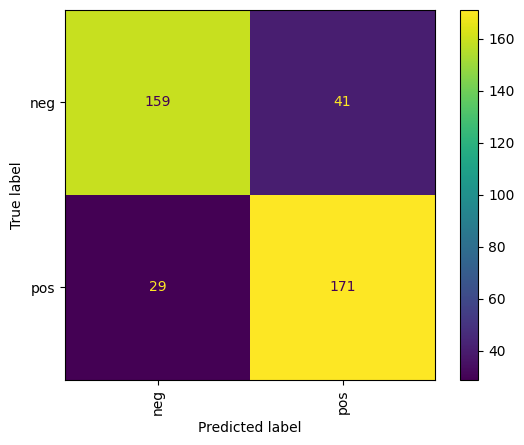

In [9]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

best_pipe.fit(X_train, y_train)
preds = best_pipe.predict(X_test)

print(classification_report(y_test, preds))

ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=preds,
    xticks_rotation=90
)

plt.show()

## LogisticRegression

In [10]:
df = pd.read_csv("outputs/LogisticRegression_polarity_grid_results.csv")
df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__penalty,param_classifier__solver,param_classifier__tol,param_vectorizer__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
43,24.098338,1.349892,0.966499,0.341275,1.0000,l2,lbfgs,0.0001,"(1, 2)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.812500,0.846875,0.850000,0.840625,0.809375,0.831875,0.017388,1
42,2.357963,0.201027,0.283969,0.022385,1.0000,l2,lbfgs,0.0001,"(1, 1)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.809375,0.821875,0.837500,0.868750,0.806250,0.828750,0.022827,2
44,62.136795,4.138098,0.988155,0.481357,1.0000,l2,lbfgs,0.0001,"(1, 3)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.793750,0.843750,0.850000,0.840625,0.812500,0.828125,0.021469,3
36,2.431994,0.053296,0.244074,0.013695,1.0000,l2,saga,0.0001,"(1, 1)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.775000,0.843750,0.815625,0.828125,0.806250,0.813750,0.023100,4
37,16.205918,0.736606,0.692287,0.038642,1.0000,l2,saga,0.0001,"(1, 2)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.771875,0.837500,0.825000,0.834375,0.796875,0.813125,0.025109,5
24,8.580147,0.149722,0.239662,0.017181,1.0000,l1,saga,0.0001,"(1, 1)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.771875,0.840625,0.818750,0.818750,0.803125,0.810625,0.022759,6
25,30.083034,0.515219,0.585488,0.079542,1.0000,l1,saga,0.0001,"(1, 2)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.762500,0.837500,0.828125,0.821875,0.790625,0.808125,0.027712,7
26,50.601026,1.326470,0.881842,0.058832,1.0000,l1,saga,0.0001,"(1, 3)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.762500,0.828125,0.828125,0.825000,0.790625,0.806875,0.026324,8
38,35.035143,0.824309,1.105001,0.119233,1.0000,l2,saga,0.0001,"(1, 3)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.768750,0.828125,0.821875,0.812500,0.793750,0.805000,0.021524,9
20,22.065703,1.823981,1.225890,0.255593,0.0001,l2,lbfgs,0.0001,"(1, 3)","{'classifier__C': 0.0001, 'classifier__penalty...",0.709375,0.712500,0.715625,0.712500,0.737500,0.717500,0.010193,10


In [11]:
from ast import literal_eval

# best params
best_params = literal_eval(df.sort_values(by="rank_test_score").iloc[1]["params"])
best_params

{'classifier__C': 1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs',
 'classifier__tol': 0.0001,
 'vectorizer__ngram_range': (1, 1)}

In [12]:
from sklearn.linear_model import LogisticRegression

best_pipe = Pipeline(
    steps=[
        ("vectorizer", CountVectorizer(dtype=np.float64)),
        ("classifier", LogisticRegression())
    ],
)

best_pipe = best_pipe.set_params(**best_params)
print(best_pipe.get_params())

{'memory': None, 'steps': [('vectorizer', CountVectorizer(dtype=<class 'numpy.float64'>)), ('classifier', LogisticRegression(C=1))], 'verbose': False, 'vectorizer': CountVectorizer(dtype=<class 'numpy.float64'>), 'classifier': LogisticRegression(C=1), 'vectorizer__analyzer': 'word', 'vectorizer__binary': False, 'vectorizer__decode_error': 'strict', 'vectorizer__dtype': <class 'numpy.float64'>, 'vectorizer__encoding': 'utf-8', 'vectorizer__input': 'content', 'vectorizer__lowercase': True, 'vectorizer__max_df': 1.0, 'vectorizer__max_features': None, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1), 'vectorizer__preprocessor': None, 'vectorizer__stop_words': None, 'vectorizer__strip_accents': None, 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b', 'vectorizer__tokenizer': None, 'vectorizer__vocabulary': None, 'classifier__C': 1, 'classifier__class_weight': None, 'classifier__dual': False, 'classifier__fit_intercept': True, 'classifier__intercept_scaling': 1, 'classifier__l1_rati

/home/user/unb/unb_mestrado/2_semestre/topicos_nlp/nlp/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         neg       0.82      0.88      0.85       200
         pos       0.87      0.81      0.83       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



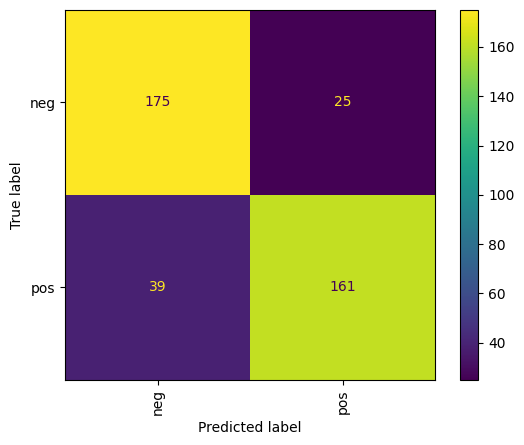

In [13]:
best_pipe.fit(X_train, y_train)
preds = best_pipe.predict(X_test)

print(classification_report(y_test, preds))

ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=preds,
    xticks_rotation=90
)

plt.show()

## LGBM

In [16]:
df = pd.read_csv("outputs/LGBMClassifier_polarity_grid_results.csv")
df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__boosting_type,param_classifier__learning_rate,param_classifier__num_leaves,param_vectorizer__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,57.283318,7.980517,0.844147,0.142138,gbdt,0.1,10,"(1, 2)","{'classifier__boosting_type': 'gbdt', 'classif...",0.793750,0.859375,0.853125,0.828125,0.843750,0.835625,0.023435,1
30,54.378674,30.504263,0.359543,0.092158,gbdt,0.1,10,"(1, 1)","{'classifier__boosting_type': 'gbdt', 'classif...",0.787500,0.850000,0.846875,0.825000,0.837500,0.829375,0.022673,2
34,116.754446,26.266212,0.939559,0.122278,gbdt,0.1,20,"(1, 2)","{'classifier__boosting_type': 'gbdt', 'classif...",0.809375,0.846875,0.834375,0.818750,0.825000,0.826875,0.012900,3
35,159.735271,19.288703,1.636696,0.172737,gbdt,0.1,20,"(1, 3)","{'classifier__boosting_type': 'gbdt', 'classif...",0.778125,0.850000,0.834375,0.812500,0.853125,0.825625,0.027769,4
38,234.700427,18.724303,1.630637,0.192624,gbdt,0.1,31,"(1, 3)","{'classifier__boosting_type': 'gbdt', 'classif...",0.787500,0.828125,0.840625,0.821875,0.840625,0.823750,0.019526,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,7.916863,0.308458,0.000000,0.000000,rf,0.1,40,"(1, 2)","{'classifier__boosting_type': 'rf', 'classifie...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,91
131,19.089769,0.194915,0.000000,0.000000,rf,0.1,40,"(1, 3)","{'classifier__boosting_type': 'rf', 'classifie...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,91
132,1.519425,0.111671,0.000000,0.000000,rf,0.1,50,"(1, 1)","{'classifier__boosting_type': 'rf', 'classifie...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,91
133,8.172029,0.521319,0.000000,0.000000,rf,0.1,50,"(1, 2)","{'classifier__boosting_type': 'rf', 'classifie...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,91


In [17]:
from ast import literal_eval

# best params
best_params = literal_eval(df.sort_values(by="rank_test_score").iloc[1]["params"])
best_params

{'classifier__boosting_type': 'gbdt',
 'classifier__learning_rate': 0.1,
 'classifier__num_leaves': 10,
 'vectorizer__ngram_range': (1, 1)}

In [18]:
from lightgbm import LGBMClassifier

best_pipe = Pipeline(
    steps=[
        ("vectorizer", CountVectorizer(dtype=np.float64)),
        ("classifier", LGBMClassifier(objective="binary", verbose=-1))
    ],
)

best_pipe = best_pipe.set_params(**best_params)
print(best_pipe.get_params())

{'memory': None, 'steps': [('vectorizer', CountVectorizer(dtype=<class 'numpy.float64'>)), ('classifier', LGBMClassifier(num_leaves=10, objective='binary', verbose=-1))], 'verbose': False, 'vectorizer': CountVectorizer(dtype=<class 'numpy.float64'>), 'classifier': LGBMClassifier(num_leaves=10, objective='binary', verbose=-1), 'vectorizer__analyzer': 'word', 'vectorizer__binary': False, 'vectorizer__decode_error': 'strict', 'vectorizer__dtype': <class 'numpy.float64'>, 'vectorizer__encoding': 'utf-8', 'vectorizer__input': 'content', 'vectorizer__lowercase': True, 'vectorizer__max_df': 1.0, 'vectorizer__max_features': None, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1), 'vectorizer__preprocessor': None, 'vectorizer__stop_words': None, 'vectorizer__strip_accents': None, 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b', 'vectorizer__tokenizer': None, 'vectorizer__vocabulary': None, 'classifier__boosting_type': 'gbdt', 'classifier__class_weight': None, 'classifier__colsample_by

              precision    recall  f1-score   support

         neg       0.85      0.81      0.83       200
         pos       0.82      0.85      0.84       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



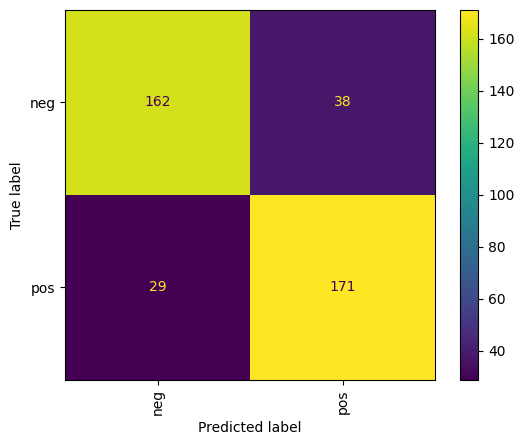

In [19]:
best_pipe.fit(X_train, y_train)
preds = best_pipe.predict(X_test)

print(classification_report(y_test, preds))

ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=preds,
    xticks_rotation=90
)

plt.show()